# 相关模块导入

In [185]:
from IPython.core.interactiveshell import InteractiveShell

import copy
import calendar
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 数据读取与总览

In [186]:
raw_data = pd.read_csv('data/train/train.csv')
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [187]:
raw_data.head()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


# 去除无需训练的列

In [188]:
raw_data.drop(['program_type', 'id_num', 'program_id', 'test_id', 'trainee_id'], inplace=True, axis=1)

In [189]:
raw_data.head()

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,136.0,offline,intermediate,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,131.0,offline,easy,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,120.0,online,easy,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,117.0,offline,easy,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,131.0,offline,intermediate,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


# 数据分布偏度

<AxesSubplot:>

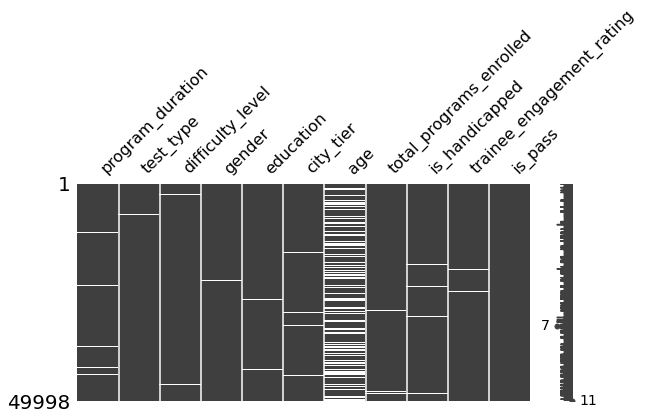

In [190]:
msno.matrix(raw_data, figsize=(9, 4))

# 数据预处理

## 获取用于缺失值填充的值

In [191]:
# program_type_nan = raw_data['program_type'].value_counts().index[0]
program_duration_nan = raw_data['program_duration'].mean()
test_type_nan = raw_data['test_type'].value_counts().index[0]
difficulty_level_nan = raw_data['difficulty_level'].value_counts().index[0]
gender_nan = raw_data['gender'].value_counts().index[0]
education_nan = raw_data['education'].value_counts().index[0]
city_tier_nan = raw_data['city_tier'].value_counts().index[0]
age_nan = raw_data['age'].value_counts().mean()
total_programs_enrolled_nan = raw_data['total_programs_enrolled'].value_counts().index[0]
is_handicapped_nan = raw_data['is_handicapped'].value_counts().index[0]
trainee_engagement_rating_nan = raw_data['trainee_engagement_rating'].value_counts().index[0]

In [192]:
# raw_data['age'].fillna(age_nan, inplace=True)

In [193]:
raw_data.dropna(axis=0, how='any', inplace=True)

In [194]:
# raw_data['program_type'].fillna(program_type_nan, inplace=True)
# raw_data['program_duration'].fillna(program_duration_nan, inplace=True)
# raw_data['test_type'].fillna(test_type_nan, inplace=True)
# raw_data['difficulty_level'].fillna(difficulty_level_nan, inplace=True)
# raw_data['gender'].fillna(gender_nan, inplace=True)
# raw_data['education'].fillna(education_nan, inplace=True)
# raw_data['city_tier'].fillna(city_tier_nan, inplace=True)
# raw_data['age'].fillna(age_nan, inplace=True)
# raw_data['total_programs_enrolled'].fillna(total_programs_enrolled_nan, inplace=True)
# raw_data['is_handicapped'].fillna(is_handicapped_nan, inplace=True)
# raw_data['trainee_engagement_rating'].fillna(trainee_engagement_rating_nan, inplace=True)

## 查看缺失值填充结果

<AxesSubplot:>

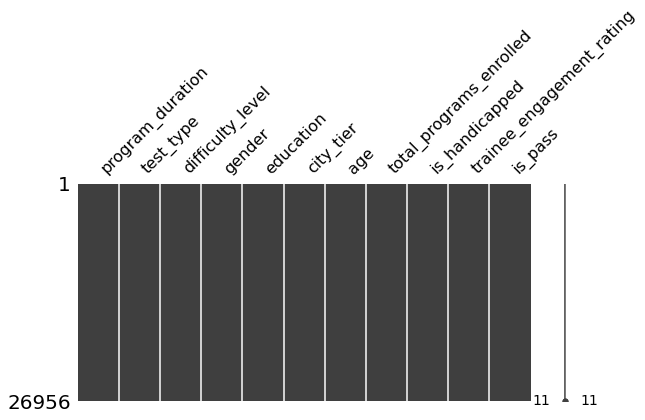

In [195]:
msno.matrix(raw_data, figsize=(9, 4))

## 对数据进行编码

In [196]:
raw_data.head()

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,136.0,offline,intermediate,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,131.0,offline,easy,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,120.0,online,easy,M,Matriculation,1.0,40.0,1.0,N,2.0,1
4,131.0,offline,intermediate,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,134.0,offline,intermediate,F,High School Diploma,1.0,29.0,4.0,N,2.0,0


In [197]:
features_2_be_encoded = ['test_type', 'difficulty_level', 'gender', 'education', 'is_handicapped']

In [198]:
for feature in features_2_be_encoded:
    print(len(raw_data[feature].value_counts()))

2
4
2
5
2


In [199]:
# raw_data = raw_data.join(pd.get_dummies(raw_data[["program_type"]]))

In [200]:
raw_data = raw_data.join(pd.get_dummies(raw_data[["difficulty_level"]]))

In [201]:
raw_data = raw_data.join(pd.get_dummies(raw_data[["education"]]))

## 去除独热编码的列

In [202]:
raw_data.drop(['difficulty_level', 'education'], inplace=True, axis=1)

## 硬编码

In [203]:
raw_data

,program_duration,test_type,gender,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification
0,136.0,offline,M,3.0,24.0,5.0,N,1.0,0,0,0,1,0,0,0,0,1,0
1,131.0,offline,F,4.0,26.0,2.0,N,3.0,1,1,0,0,0,0,1,0,0,0
2,120.0,online,M,1.0,40.0,1.0,N,2.0,1,1,0,0,0,0,0,0,1,0
4,131.0,offline,F,1.0,42.0,2.0,N,4.0,1,0,0,1,0,0,1,0,0,0
5,134.0,offline,F,1.0,29.0,4.0,N,2.0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,120.0,online,F,4.0,24.0,4.0,Y,1.0,1,1,0,0,0,0,0,0,1,0
49990,136.0,offline,F,2.0,45.0,1.0,N,2.0,1,1,0,0,0,0,1,0,0,0
49991,134.0,online,M,4.0,26.0,3.0,N,1.0,0,1,0,0,0,1,0,0,0,0
49992,120.0,online,F,4.0,26.0,1.0,N,1.0,1,1,0,0,0,0,0,0,1,0


In [204]:
test_type_map = {elem: index for index, elem in enumerate(set(raw_data["test_type"]))}
gender_map = {elem: index for index, elem in enumerate(set(raw_data["gender"]))}
is_handicapped_map = {elem: index for index, elem in enumerate(set(raw_data["is_handicapped"]))}

In [205]:
test_type_map
gender_map
is_handicapped_map

{'offline': 0, 'online': 1}

{'M': 0, 'F': 1}

{'N': 0, 'Y': 1}

In [206]:
raw_data['test_type'] = raw_data['test_type'].map(test_type_map)
raw_data['gender'] = raw_data['gender'].map(gender_map)
raw_data['is_handicapped'] = raw_data['is_handicapped'].map(is_handicapped_map)

In [207]:
encoded_data = copy.deepcopy(raw_data)

S:\DataMining\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='program_duration', ylabel='Density'>

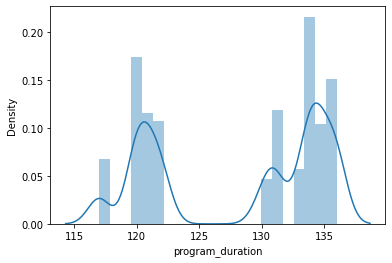

In [208]:
sns.distplot(encoded_data['program_duration'])

In [209]:
encoded_data

,program_duration,test_type,gender,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification
0,136.0,0,0,3.0,24.0,5.0,0,1.0,0,0,0,1,0,0,0,0,1,0
1,131.0,0,1,4.0,26.0,2.0,0,3.0,1,1,0,0,0,0,1,0,0,0
2,120.0,1,0,1.0,40.0,1.0,0,2.0,1,1,0,0,0,0,0,0,1,0
4,131.0,0,1,1.0,42.0,2.0,0,4.0,1,0,0,1,0,0,1,0,0,0
5,134.0,0,1,1.0,29.0,4.0,0,2.0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,120.0,1,1,4.0,24.0,4.0,1,1.0,1,1,0,0,0,0,0,0,1,0
49990,136.0,0,1,2.0,45.0,1.0,0,2.0,1,1,0,0,0,0,1,0,0,0
49991,134.0,1,0,4.0,26.0,3.0,0,1.0,0,1,0,0,0,1,0,0,0,0
49992,120.0,1,1,4.0,26.0,1.0,0,1.0,1,1,0,0,0,0,0,0,1,0


# 划分数据集

In [210]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(encoded_data, test_size=0.2, random_state=412)

print(train_set.shape)
print(test_set.shape)

(21564, 18)
(5392, 18)


In [211]:
train_set

,program_duration,test_type,gender,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification
29665,122.0,1,0,4.0,44.0,2.0,0,4.0,1,1,0,0,0,0,0,0,1,0
30054,122.0,0,0,3.0,46.0,4.0,1,2.0,1,0,0,1,0,0,1,0,0,0
8096,135.0,1,0,3.0,45.0,2.0,0,4.0,1,1,0,0,0,0,0,0,1,0
12711,135.0,0,0,3.0,43.0,12.0,0,4.0,0,0,1,0,0,0,1,0,0,0
31032,120.0,0,0,4.0,44.0,1.0,0,1.0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25049,117.0,0,1,1.0,26.0,2.0,0,1.0,0,1,0,0,0,1,0,0,0,0
37284,122.0,1,0,2.0,19.0,4.0,0,1.0,0,1,0,0,0,0,1,0,0,0
16803,131.0,0,1,2.0,48.0,2.0,0,1.0,0,0,1,0,0,0,0,0,1,0
22545,136.0,0,0,2.0,42.0,2.0,0,5.0,1,0,0,1,0,0,0,0,1,0


In [212]:
X_train = train_set[train_set.columns.difference(['is_pass'])].values
y_train = train_set[['is_pass']].values
X_test = test_set[test_set.columns.difference(['is_pass'])].values
y_test = test_set[['is_pass']].values

# 模型训练

## 评估方法

In [213]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf_model.fit(X_train, y_train.ravel())
y_predict = rf_model.predict(X=X_test)

print("accuracy_score: ", accuracy_score(y_test, y_predict))
print('confusion_matrix: ', confusion_matrix(y_test, y_predict))
print('roc_auc_score: ', roc_auc_score(y_test, y_predict))
print('classification_report: ', classification_report(y_test, y_predict))

RandomForestClassifier(n_estimators=10, n_jobs=1)

accuracy_score:  0.6941765578635015
confusion_matrix:  [[ 736  929]
 [ 720 3007]]
roc_auc_score:  0.6244285874283191
classification_report:                precision    recall  f1-score   support

           0       0.51      0.44      0.47      1665
           1       0.76      0.81      0.78      3727

    accuracy                           0.69      5392
   macro avg       0.63      0.62      0.63      5392
weighted avg       0.68      0.69      0.69      5392



## GBDT

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(random_state=412)

gbc_model.fit(X_train, y_train.ravel())
y_predict = gbc_model.predict(X=X_test)

print("accuracy_score: ", accuracy_score(y_test, y_predict))
print('confusion_matrix: ', confusion_matrix(y_test, y_predict))
print('roc_auc_score: ', roc_auc_score(y_test, y_predict))
print('classification_report: ', classification_report(y_test, y_predict))

GradientBoostingClassifier(random_state=412)

accuracy_score:  0.7127225519287834
confusion_matrix:  [[ 406 1259]
 [ 290 3437]]
roc_auc_score:  0.5830166361693059
classification_report:                precision    recall  f1-score   support

           0       0.58      0.24      0.34      1665
           1       0.73      0.92      0.82      3727

    accuracy                           0.71      5392
   macro avg       0.66      0.58      0.58      5392
weighted avg       0.69      0.71      0.67      5392



## XGBoost

In [216]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, random_state=412)

xgb_model.fit(X_train, y_train.ravel())
y_predict = xgb_model.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_predict))
print('confusion_matrix: ', confusion_matrix(y_test, y_predict))
print('roc_auc_score: ', roc_auc_score(y_test, y_predict))
print('classification_report: ', classification_report(y_test, y_predict))

[15:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


S:\DataMining\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=412,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy_score:  0.7129080118694362
confusion_matrix:  [[ 451 1214]
 [ 334 3393]]
roc_auc_score:  0.5906272787410431
classification_report:                precision    recall  f1-score   support

           0       0.57      0.27      0.37      1665
           1       0.74      0.91      0.81      3727

    accuracy                           0.71      5392
   macro avg       0.66      0.59      0.59      5392
weighted avg       0.69      0.71      0.68      5392



In [217]:
# import tensorflow
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential

In [218]:
# n_inputs = 24

In [219]:
# # define model
# model = Sequential()
# # define first hidden layer and visible layer
# model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# # define output layer
# model.add(Dense(1, activation='sigmoid'))
# # define loss and optimizer
# model.compile(loss='binary_crossentropy', optimizer='adam')
# model.fit(X_train, y_train.ravel(), epochs=10)

In [220]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import precision_recall_curve

# y_pred = model.predict(X_test)
# y_pred[y_pred > 0.5] = 1
# y_pred[y_pred <= 0.5] = 0
# print("accuracy_score: ", accuracy_score(y_test, y_pred))

## 特征选择

In [237]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [244]:
features_list = list(train_set.columns.difference(['is_pass']))

In [245]:
features_list

['age',
 'city_tier',
 'difficulty_level_easy',
 'difficulty_level_hard',
 'difficulty_level_intermediate',
 'difficulty_level_vary hard',
 'education_Bachelors',
 'education_High School Diploma',
 'education_Masters',
 'education_Matriculation',
 'education_No Qualification',
 'gender',
 'is_handicapped',
 'program_duration',
 'test_type',
 'total_programs_enrolled',
 'trainee_engagement_rating']

In [247]:
X_constant = sm.add_constant(encoded_data[features_list])

est = sm.OLS(encoded_data.is_pass, X_constant.values)
est_res = est.fit()
print(est_res.summary())

                            OLS Regression Results                            
Dep. Variable:                is_pass   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     165.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:14:37   Log-Likelihood:                -16145.
No. Observations:               26956   AIC:                         3.232e+04
Df Residuals:                   26940   BIC:                         3.245e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3438      0.038      9.028      0.0

In [248]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

best_features = SelectKBest(score_func=f_regression, k=10)
best_features_fit = best_features.fit(encoded_data, encoded_data.is_pass)
df_scores = pd.DataFrame(best_features_fit.scores_)
df_columns = pd.DataFrame(encoded_data.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['features','score']

print(feature_scores.nlargest(29, 'score'))

                         features         score
7       trainee_engagement_rating  1.128661e+03
1                       test_type  8.389728e+02
9           difficulty_level_easy  3.201233e+02
12     difficulty_level_vary hard  2.064040e+02
16        education_Matriculation  1.934630e+02
3                       city_tier  1.880449e+02
4                             age  1.540504e+02
11  difficulty_level_intermediate  1.208242e+02
13            education_Bachelors  6.196172e+01
14  education_High School Diploma  4.416937e+01
15              education_Masters  4.403396e+01
6                  is_handicapped  3.207651e+01
5         total_programs_enrolled  2.677703e+01
10          difficulty_level_hard  1.990757e+01
17     education_No Qualification  1.747365e+01
2                          gender  7.592619e+00
0                program_duration  1.981831e-01
8                         is_pass -2.890239e+18


In [290]:
best_10_features_list = [i[0] for i in feature_scores.nlargest(29, 'score').values][:10]
best_10_features_list.append('is_pass')
print(best_10_features_list)

['trainee_engagement_rating', 'test_type', 'difficulty_level_easy', 'difficulty_level_vary hard', 'education_Matriculation', 'city_tier', 'age', 'difficulty_level_intermediate', 'education_Bachelors', 'education_High School Diploma', 'is_pass']


In [265]:
data_best_10_features = encoded_data[best_10_features_list]

In [266]:
train_set_best_10, test_set_best_10 = train_test_split(data_best_10_features, test_size=0.2, random_state=412)

print(train_set_best_10.shape)
print(test_set_best_10.shape)

(21564, 11)
(5392, 11)


In [267]:
train_set_best_10

,trainee_engagement_rating,test_type,difficulty_level_easy,difficulty_level_vary hard,education_Matriculation,city_tier,age,difficulty_level_intermediate,education_Bachelors,education_High School Diploma,is_pass
29665,4.0,1,1,0,1,4.0,44.0,0,0,0,1
30054,2.0,0,0,0,0,3.0,46.0,1,0,1,1
8096,4.0,1,1,0,1,3.0,45.0,0,0,0,1
12711,4.0,0,0,0,0,3.0,43.0,0,0,1,0
31032,1.0,0,1,0,1,4.0,44.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25049,1.0,0,1,0,0,1.0,26.0,0,1,0,0
37284,1.0,1,1,0,0,2.0,19.0,0,0,1,0
16803,1.0,0,0,0,1,2.0,48.0,0,0,0,0
22545,5.0,0,0,0,1,2.0,42.0,1,0,0,1


In [268]:
X_best_10_train = train_set_best_10[train_set_best_10.columns.difference(['is_pass'])].values
y_best_10_train = train_set_best_10[['is_pass']].values
X_best_10_test = test_set_best_10[test_set_best_10.columns.difference(['is_pass'])].values
y_best_10_test = test_set_best_10[['is_pass']].values

## 随机森林

In [304]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf_model.fit(X_best_10_train, y_best_10_train.ravel())
y_predict = rf_model.predict(X=X_best_10_test)

print("accuracy_score: ", accuracy_score(y_test, y_predict))
print('confusion_matrix: ', confusion_matrix(y_test, y_predict))
print('roc_auc_score: ', roc_auc_score(y_test, y_predict))
print('classification_report: ', classification_report(y_test, y_predict))

RandomForestClassifier(n_estimators=10, n_jobs=1)

accuracy_score:  0.6821216617210683
confusion_matrix:  [[ 547 1118]
 [ 596 3131]]
roc_auc_score:  0.58430719423475
classification_report:                precision    recall  f1-score   support

           0       0.48      0.33      0.39      1665
           1       0.74      0.84      0.79      3727

    accuracy                           0.68      5392
   macro avg       0.61      0.58      0.59      5392
weighted avg       0.66      0.68      0.66      5392



## XGBoost

In [306]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, random_state=412)

xgb_model.fit(X_best_10_train, y_best_10_train.ravel())
y_predict = xgb_model.predict(X_best_10_test)

print("accuracy_score: ", accuracy_score(y_test, y_predict))
print('confusion_matrix: ', confusion_matrix(y_test, y_predict))
print('roc_auc_score: ', roc_auc_score(y_test, y_predict))
print('classification_report: ', classification_report(y_test, y_predict))

S:\DataMining\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=412,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy_score:  0.7086424332344213
confusion_matrix:  [[ 370 1295]
 [ 276 3451]]
roc_auc_score:  0.5740840115672421
classification_report:                precision    recall  f1-score   support

           0       0.57      0.22      0.32      1665
           1       0.73      0.93      0.81      3727

    accuracy                           0.71      5392
   macro avg       0.65      0.57      0.57      5392
weighted avg       0.68      0.71      0.66      5392



# A榜提交数据生成

In [307]:
test_data = pd.read_csv('data/test/test1.csv')
test_data.head()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,1442_124,Y,Y_4,121,124,online,easy,1442,M,High School Diploma,2,NaN,8,N,4.0,NaN
1,12373_38,T,T_2,117,38,online,easy,12373,F,High School Diploma,4,31.0,2,N,3.0,NaN
2,12035_21,T,T_3,134,21,offline,easy,12035,F,High School Diploma,4,NaN,2,N,1.0,NaN
3,11148_86,V,V_3,131,86,offline,vary hard,11148,M,Matriculation,1,NaN,2,N,1.0,NaN
4,1362_131,Y,Y_3,135,131,online,easy,1362,M,High School Diploma,2,45.0,2,N,4.0,NaN


## 去除无用列

In [308]:
test_data.drop(['program_type', 'id_num', 'program_id', 'test_id', 'trainee_id'], inplace=True, axis=1)

## 缺失值填充

In [309]:
# program_type_nan = test_data['program_type'].value_counts().index[0]
program_duration_nan = test_data['program_duration'].mean()
test_type_nan = test_data['test_type'].value_counts().index[0]
difficulty_level_nan = test_data['difficulty_level'].value_counts().index[0]
gender_nan = test_data['gender'].value_counts().index[0]
education_nan = test_data['education'].value_counts().index[0]
city_tier_nan = test_data['city_tier'].value_counts().index[0]
age_nan = test_data['age'].mean()
total_programs_enrolled_nan = test_data['total_programs_enrolled'].value_counts().index[0]
is_handicapped_nan = test_data['is_handicapped'].value_counts().index[0]
trainee_engagement_rating_nan = test_data['trainee_engagement_rating'].value_counts().index[0]

In [310]:
test_data['age'].fillna(age_nan, inplace=True)

In [311]:
# test_data['program_type'].fillna(program_type_nan, inplace=True)
# test_data['program_duration'].fillna(program_duration_nan, inplace=True)
# test_data['test_type'].fillna(test_type_nan, inplace=True)
# test_data['difficulty_level'].fillna(difficulty_level_nan, inplace=True)
# test_data['gender'].fillna(gender_nan, inplace=True)
# test_data['education'].fillna(education_nan, inplace=True)
# test_data['city_tier'].fillna(city_tier_nan, inplace=True)
# test_data['age'].fillna(age_nan, inplace=True)
# test_data['total_programs_enrolled'].fillna(total_programs_enrolled_nan, inplace=True)
# test_data['is_handicapped'].fillna(is_handicapped_nan, inplace=True)
# test_data['trainee_engagement_rating'].fillna(trainee_engagement_rating_nan, inplace=True)

## 缺失值填充结果

<AxesSubplot:>

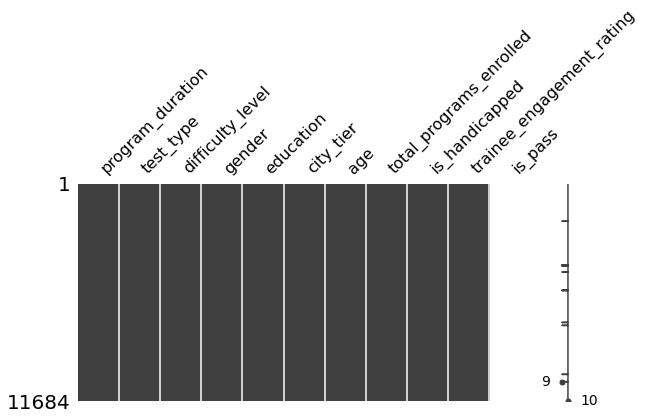

In [312]:
msno.matrix(test_data, figsize=(9, 4))

## 独热编码

In [313]:
# test_data = test_data.join(pd.get_dummies(test_data[["program_type"]]))
test_data = test_data.join(pd.get_dummies(test_data[["difficulty_level"]]))
test_data = test_data.join(pd.get_dummies(test_data[["education"]]))

## 去除独热编码的列

In [314]:
test_data.drop(['difficulty_level', 'education'], inplace=True, axis=1)

## 硬编码

In [315]:
test_data['test_type'] = test_data['test_type'].map(test_type_map)
test_data['gender'] = test_data['gender'].map(gender_map)
test_data['is_handicapped'] = test_data['is_handicapped'].map(is_handicapped_map)

In [316]:
best_10_features_list_without_label = best_10_features_list[:-1]

In [317]:
test_data = test_data[best_10_features_list_without_label]

In [318]:
X_submit = test_data.values

In [319]:
y_submit = xgb_model.predict(X_submit)

In [320]:
id_num = pd.read_csv('data/test/test1.csv')['id_num']

In [321]:
id_num

0         1442_124
1         12373_38
2         12035_21
3         11148_86
4         1362_131
           ...    
11679     3882_161
11680      3426_38
11681    13063_142
11682      5667_82
11683     4467_119
Name: id_num, Length: 11684, dtype: object

In [322]:
submission = pd.DataFrame({
        "id_num": id_num,
        "is_pass": y_submit
    })
submission.to_csv('data/submission_Giyn.csv', index=False)